# Домашнее задание к лекции "Статистика. Практика"

## Задание 1

Вернемся к [набору данных о видеоиграх](https://github.com/obulygin/pyda_homeworks/blob/master/stat_case_study/vgsales.csv).

Ответьте на следующие вопросы:

1) Как критики относятся к спортивным играм?  
2) Критикам нравятся больше игры на PC или на PS4?  
3) Критикам больше нравятся стрелялки или стратегии?  

Для каждого вопроса:
- сформулируйте нулевую и альтернативную гипотезы;
- выберите пороговый уровень статистической значимости;
- опишите полученные результаты статистического теста.

In [17]:
 # Подгрузим пакеты 
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy import stats 
matplotlib.style.use('ggplot')
%matplotlib inline
import seaborn as sns

In [18]:
df_games = pd.read_csv('vgsales.csv', error_bad_lines=False)  # Откроем датасет
display(df_games.head())
display(df_games.info())


,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


None

Очистка и препроцессинг:


In [20]:
df_games['User_Score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [21]:
df_games['Critic_Score'] = df_games['Critic_Score'].replace('tbd', np.NaN)
df_games['User_Score'] = df_games['Critic_Score'].replace('tbd', np.NaN)
df_games['Critic_Score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

In [23]:
df_games['User_Score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

Уточнение типов данных:

In [85]:
# исправим типы данных
df_games['Year_of_Release'] = df_games['Year_of_Release'].astype('Int64')
df_games['User_Count'] = df_games['User_Count'].astype('Int64')
df_games['User_Score'] = df_games['User_Score'].astype('float64')
df_games['Critic_Count'] = df_games['Critic_Count'].astype('float64')



Удалим из датасета строки с незаполненными оценками критиков:

In [88]:
# Удалим строки с незаполнеными значениями оценок критиков:
pct_all = len(df_games['Critic_Score'])
pct_count = np.mean(df_games['Critic_Score'].notna())
pct_missing = np.mean(df_games['Critic_Score'].isnull())
print('Количество всего значений:', pct_all)
print(f'Процент ненулевых значений: {pct_count*100:.2f}')
print(f'Процент нулевых значений:{pct_missing*100:.2f}')

df_games = df_games.dropna(subset=['Critic_Score'])
print ('После обработки:')
pct_all = len(df_games['Critic_Score'])
pct_count = np.mean(df_games['Critic_Score'].notna())
pct_missing = np.mean(df_games['Critic_Score'].isnull())
print('Количество всего значений:', pct_all)
print(f'Процент ненулевых значений: {pct_count*100:.2f}')
print(f'Процент нулевых значений:{pct_missing*100:.2f}')


Количество всего значений: 8137
Процент ненулевых значений: 100.00
Процент нулевых значений:0.00
После обработки:
Количество всего значений: 8137
Процент ненулевых значений: 100.00
Процент нулевых значений:0.00


1) Как критики относятся к спортивным играм?

In [89]:
# Выделим датасет спортивных игр:
df_sports = df_games[df_games['Genre'] == 'Sports']

Среднее значение оценки критиков по классу спортивных игр: 72.0


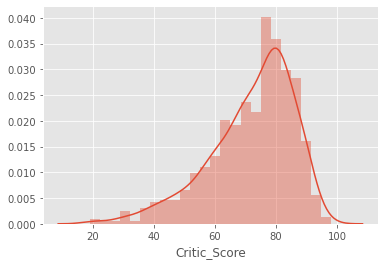

In [90]:
print(f'Среднее значение оценки критиков по классу спортивных игр: {df_sports["Critic_Score"].mean():.1f}')
sns.distplot(df_sports['Critic_Score'])
plt.show()


In [91]:
print('Проверка нормальности распределения:')
print("Shapiro-Wilk test, W-statistic: %f, p-value: %f" % stats.kstest(df_sports["Critic_Score"], 'norm'))


Проверка нормальности распределения:
Shapiro-Wilk test, W-statistic: 1.000000, p-value: 0.000000


count    1194.000000
mean       71.968174
std        13.878433
min        19.000000
25%        64.000000
50%        75.000000
75%        82.000000
max        98.000000
Name: Critic_Score, dtype: float64

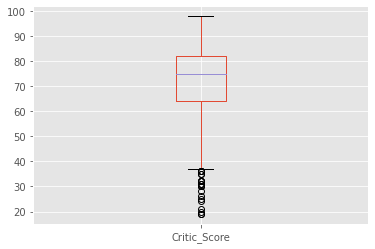

In [93]:
df_sports.boxplot('Critic_Score')
display(df_sports['Critic_Score'].describe())


2) Критикам нравятся больше игры на PC или на PS4?

In [94]:
# Выделим датасеты игр на PC или PS4:
print(df_games.Platform.unique())
df_PC = df_games[df_games['Platform'] == 'PC']
df_PS4= df_games[df_games['Platform'] == 'PS4']


['Wii' 'DS' 'X360' 'PS3' 'PS2' '3DS' 'PS4' 'PS' 'XB' 'PC' 'PSP' 'WiiU'
 'GC' 'GBA' 'XOne' 'PSV' 'DC']


Выборка по играм  на платформе PC:

In [97]:
display(df_PC['Critic_Score'].describe())


count    715.000000
mean      75.928671
std       11.170775
min       33.000000
25%       70.000000
50%       78.000000
75%       84.000000
max       96.000000
Name: Critic_Score, dtype: float64

Выборка по играм  на платформе PS4:

In [98]:
display(df_PS4['Critic_Score'].describe())

count    252.000000
mean      72.091270
std       12.485992
min       19.000000
25%       66.000000
50%       73.000000
75%       80.000000
max       97.000000
Name: Critic_Score, dtype: float64

Визуализируем распределения: 

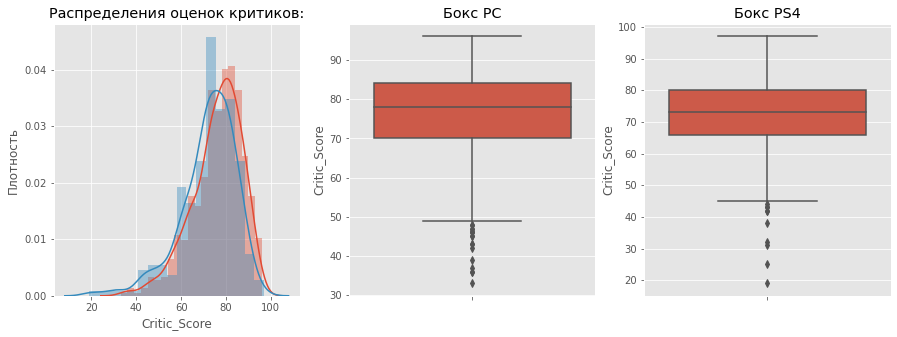

In [99]:
plt.figure(figsize=(15, 5))
plt.subplot(1,3,1).set(title='Распределения оценок критиков:')
plt.ylabel('Плотность')
sns.distplot(df_PC['Critic_Score'])
sns.distplot(df_PS4['Critic_Score'])

plt.subplot(1,3,2).set(title='Бокс PC')
sns.boxplot(y=df_PC['Critic_Score'])
plt.subplot(1,3,3).set(title='Бокс PS4')
sns.boxplot(y=df_PS4['Critic_Score'])
plt.show()

In [100]:
print(f'Средняя оценка критиков на платформе PC: {df_PC["Critic_Score"].mean():.1f}')
print(f'Средняя оценка критиков на платформе PS4: {df_PS4["Critic_Score"].mean():.1f}')

Средняя оценка критиков на платформе PC: 75.9
Средняя оценка критиков на платформе PS4: 72.1


In [108]:
significance = 0.05
print('Проверка нормальности распределения. Тест Колмогорова-Смирнова:')
# tats.kstest(x, "norm", alternative='less')
print("Для платформы PC, KS-statistic: %f, p-value: %f" % stats.kstest(df_PC["Critic_Score"], 'norm'))
print("Для платформы PS4, KS-statistic:: %f, p-value: %f" % stats.kstest(df_PS4["Critic_Score"], 'norm'))

Проверка нормальности распределения. Тест Колмогорова-Смирнова:
Для платформы PC, KS-statistic: 1.000000, p-value: 0.000000
Для платформы PS4, KS-statistic:: 1.000000, p-value: 0.000000


Распределение выборки не подчиняется нормальному закону. Для оценки статистической значитмости различий применяем непараметрические тесты.

Определим насколько статистически значима разница между распределениями при помощи теста **Колмогорова-Смирнова**:
1. **H0:**  *выбороки оценок критиков для платформ PC и PS4 извлечены из одного распределения.*
2. **H1:**  *выбороки оценок критиков для платформ PC и PS4 извлечены из разных распределений.*

In [114]:
significance = 0.05

KSvalue, pvalue = stats.ks_2samp(df_PC['Critic_Score'], df_PS4['Critic_Score'])
print ('По двухвыборочному тесту Колмогорова-Смирнова:')
print(f'KS_value: {KSvalue:.3f}, _pvalue: {pvalue:.3f} заданный уровень значимости: {significance:.3f}')


if pvalue <= significance:
    print(f'На {significance:.2f} уровене значимости, мы отвергаем нулевую гипотезе и принимаем H1.')
    print('Выбороки оценок критиков для платформ PC и PS4 извлечены из разных распределений.')
else:
    print(f'На {significance:.2f} уровене значимости, мы не можем отвергнуть нулевую гипотезу.')
    print('Выбороки оценок критиков для платформ PC и PS4 извлечены из одного распределения.')
print('')




По двухвыборочному тесту Колмогорова-Смирнова:
KS_value: 0.156, _pvalue: 0.000 заданный уровень значимости: 0.050
На 0.05 уровене значимости, мы отвергаем нулевую гипотезе и принимаем H1.
Различия между двумя множествами статистически достоверны.



## Задание 2

Реализуйте базовую модель логистической регрессии для классификации текстовых сообщений (используемые данные [здесь](https://github.com/obulygin/pyda_homeworks/blob/master/stat_case_study/spam.csv)) по признаку спама. Для этого:

1) Привидите весь текст к нижнему регистру;  
2) Удалите мусорные символы;  
3) Удалите стоп-слова;  
4) Привидите все слова к нормальной форме;  
5) Преобразуйте все сообщения в вектора TF-IDF. Вам поможет следующий код:  

```
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(df.Message)
names = tfidf.get_feature_names()
tfidf_matrix = pd.DataFrame(tfidf_matrix.toarray(), columns=names)
```

Можете поэкспериментировать с параметрами [TfidfVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html);  
6) Разделите данные на тестовые и тренировочные в соотношении 30/70, укажите `random_state=42`. Используйте [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html);  
7) Постройте модель [логистической регрессии](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html), укажите `random_state=42`, оцените ее точность на тестовых данных;  
8) Опишите результаты при помощи [confusion_matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html?highlight=confusion_matrix#sklearn.metrics.confusion_matrix);  
9) Постройте датафрейм, который будет содержать все исходные тексты сообщений, классифицированные неправильно (с указанием фактического и предсказанного).

#### ПРИМЕЧАНИЕ
Домашнее задание сдается ссылкой [Google Colab](https://colab.research.google.com/).
Не сможем проверить или помочь, если вы пришлете:
- файлы;
- архивы;
- скриншоты кода.

Все обсуждения и консультации по выполнению домашнего задания ведутся только на соответствующем канале в slack.

##### Как правильно задавать вопросы аспирантам, преподавателям и коллегам?
Прежде чем задать вопрос необходимо попробовать найти ответ самому в интернете. Навык самостоятельного поиска информации – один из важнейших, и каждый практикующий специалист любого уровня это делает каждый день.

Любой вопрос должен быть сформулирован по алгоритму:  
1) Что я делаю?  
2) Какого результата я ожидаю?  
3) Как фактический результат отличается от ожидаемого?  
4) Что я уже попробовал сделать, чтобы исправить проблему?  

По возможности, прикрепляйте к вопросу скриншоты, либо ссылки на код. Оставляйте только проблемный и воспроизводимый участок кода, все решение выкладывать не допускается.
